In [152]:
import skimage
from skimage import io, filters, color
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
import PIL
from PIL import Image, ImageOps
%matplotlib inline
skimage.__version__

'0.17.2'

<class 'numpy.ndarray'>
(971, 766)


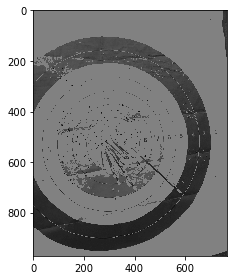

In [153]:
def average(image):
    minVal = np.amin(image)
    meanVal = np.mean(image)

    for x in np.nditer(image, op_flags=['readwrite']):
        if x > minVal + 0.34:
            x[...] = meanVal

    return image

image = skimage.img_as_float(io.imread('./res/strzalyTest.png'))
image_gray = color.rgb2gray(image)
image_test = average(image_gray)
io.imshow(image_test)
print(type(image_test))
print(image_test.shape)

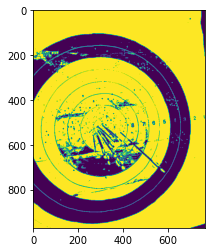

In [154]:
image_filtered = image_test > filters.threshold_otsu(image_test)
plt.imshow(image_filtered)



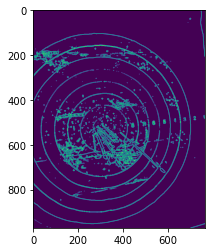

In [155]:
image_filtered = filters.sobel(image_filtered)
plt.imshow(image_filtered)

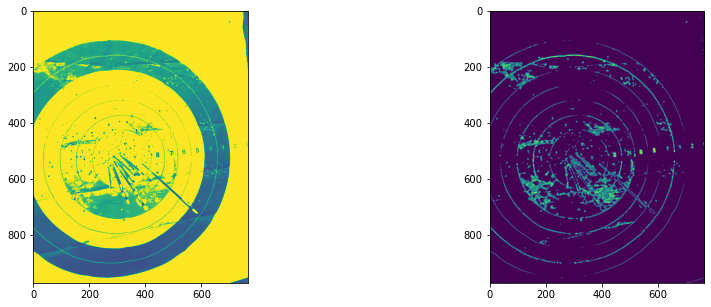

In [156]:
# coins = skimage.data.coins()
image_filtered = filters.median(image_filtered, selem=np.ones((5, 5)))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(image_test)
ax1.imshow(skimage.morphology.area_closing(image_filtered))

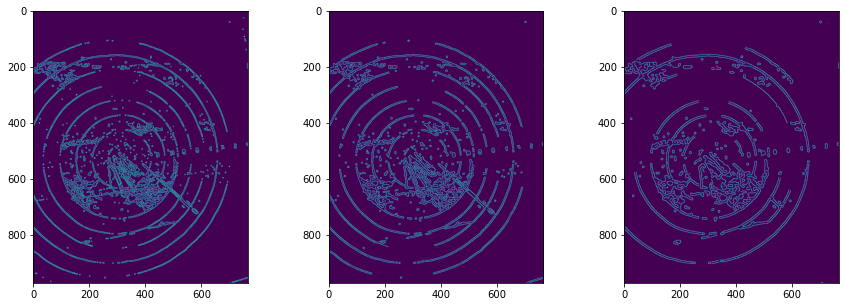

In [157]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5))
ax0.imshow(skimage.feature.canny(image_filtered, sigma=1))
ax1.imshow(skimage.feature.canny(image_filtered, sigma=2))
ax2.imshow(skimage.feature.canny(image_filtered, sigma=3))

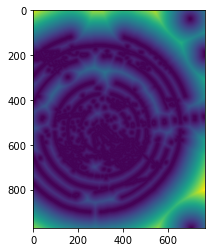

In [158]:
from scipy.ndimage import distance_transform_edt

edges = skimage.feature.canny(image_filtered, sigma=2.78)
dt = distance_transform_edt(~edges)

plt.imshow(dt);

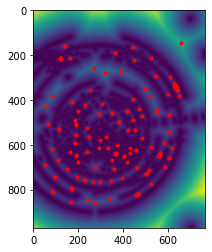

In [159]:
dis = 20
local_max = skimage.feature.peak_local_max(dt, indices=False, min_distance=dis)
peak_idx = skimage.feature.peak_local_max(dt, indices=True, min_distance=dis)
plt.plot(peak_idx[:,1], peak_idx[:,0], 'r.')
plt.imshow(dt);

In [160]:
from skimage import measure
markers = measure.label(local_max)

d:\python\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


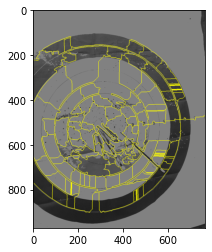

In [161]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(image_test, labels))

d:\python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  after removing the cwd from sys.path.


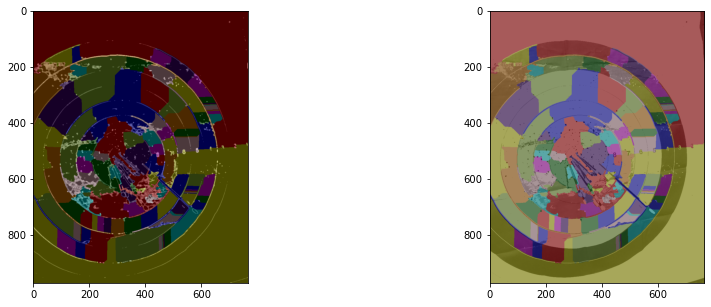

In [162]:
from skimage import color
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(color.label2rgb(labels, image=image_filtered))
ax1.imshow(color.label2rgb(labels, image=image_test))

d:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """Entry point for launching an IPython kernel.


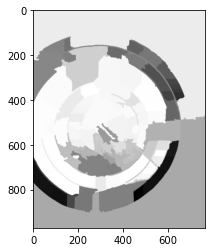

In [163]:
plt.imshow(color.label2rgb(labels, image=image_test, kind='avg'), cmap='gray')

In [164]:
# measure.regionprops?

(array([31.,  8.,  2.,  5.,  6.,  5.,  3.,  2.,  1.,  2.,  3.,  1.,  0.,
         1.,  3.,  2.,  1.,  1.,  3.,  0.,  3.,  0.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.,  1.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
         0.,  1.,  2.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.

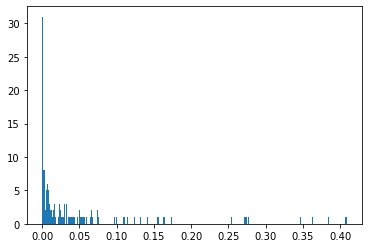

In [165]:
regions = measure.regionprops(labels, intensity_image=image_filtered)
regions_means = [r.mean_intensity for r in regions]
plt.hist(regions_means, bins=256)

In [166]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

regions_means = np.array(regions_means).reshape(-1,1)
regions_means[:5]

array([[0.00283987],
       [0.00150925],
       [0.03973423],
       [0.0076184 ],
       [0.02785289]])

In [167]:
model.fit(regions_means)
print(model.cluster_centers_)

[[0.27892553]
 [0.02480404]]


In [168]:
bg_fg_labels = model.predict(regions_means)
bg_fg_labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [169]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

d:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """Entry point for launching an IPython kernel.


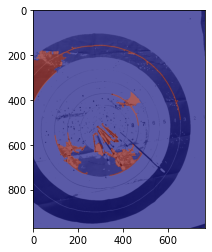

In [170]:
plt.imshow(color.label2rgb(classified_labels, image=image_test))